In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.spatial import cKDTree

In [2]:
csv = '../AnalysisReadyDataFrames/queens_df.csv'
df = pd.DataFrame(pd.read_csv(csv))

In [3]:
df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear
0,queens,Jamaica,153-30 89th Avenue,2.0,2.0,1040.00,3000.0,-73.802233,40.705192,11432,103.0,1705.0
1,queens,Corona,97-11 Horace Harding Expressway,1.0,1.0,713.00,2003.0,-73.861895,40.736073,11368,110.0,2102.0
2,queens,Astoria,32-57 46th Street,3.0,2.0,1200.00,3500.0,-73.915120,40.755264,11103,115.0,1943.0
3,queens,Long Island City,29-59 Northern Boulevard,0.5,1.0,578.26,3184.0,-73.854861,40.758454,11368,115.0,1943.0
4,queens,Woodside,33-16 61st Street,2.0,1.0,843.04,2250.0,-73.903724,40.737006,11377,104.0,1473.0


In [4]:
# write lines aggregate to file for later use
with open('sublines_agg.json', 'r') as fp:
    lines_data = json.load(fp)

In [5]:
train_lines_ckd = {}

In [6]:
def create_lines_ckd(ckd_map:dict, lines_data:dict):
    for line in lines_data.keys():
        if line not in ckd_map:
            ckd_map[line] = None
        
        ckd_map[line] = cKDTree(lines_data[line])


In [7]:
create_lines_ckd(train_lines_ckd, lines_data)

In [8]:
train_lines_ckd.keys()

dict_keys(['G', 'Q', 'M', 'S', 'A', 'B-D', 'B-D-F-M', 'R', 'N-Q-R', 'N-Q', 'N-R', 'F', 'F-M', 'E', '7', 'J-Z', 'L', 'A-C', 'D', '1-2-3', 'B', '4-5-6', 'N', '1', 'N-W', '2-3', '2', '4-5', '5', '4', '3', 'A-C-E', 'N-Q-R-W', 'N-R-W', '6', 'R-W'])

In [9]:
def grid_search_line(lon, lat):
    nearests = []
    for line in train_lines_ckd:
        dist, _ = train_lines_ckd[line].query([lon, lat], k=1)
        nearests.append([dist, line])
    
    nearests.sort(key= lambda x: x[0])

    return nearests[0][1]

In [10]:
df['Train_Line'] = None

In [11]:
for idx, row in df.iterrows():
    lon, lat = row['Long'], row['Lat'],
    line_nearest = grid_search_line(lon, lat)
    df.at[idx, 'Train_Line'] = line_nearest

In [12]:
df

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line
0,queens,Jamaica,153-30 89th Avenue,2.0,2.0,1040.00,3000.0,-73.802233,40.705192,11432,103.0,1705.0,F
1,queens,Corona,97-11 Horace Harding Expressway,1.0,1.0,713.00,2003.0,-73.861895,40.736073,11368,110.0,2102.0,R
2,queens,Astoria,32-57 46th Street,3.0,2.0,1200.00,3500.0,-73.915120,40.755264,11103,115.0,1943.0,M
3,queens,Long Island City,29-59 Northern Boulevard,0.5,1.0,578.26,3184.0,-73.854861,40.758454,11368,115.0,1943.0,7
4,queens,Woodside,33-16 61st Street,2.0,1.0,843.04,2250.0,-73.903724,40.737006,11377,104.0,1473.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,queens,Hammels,7305 Lighthouse Drive,3.0,2.5,1350.00,3100.0,-73.801350,40.588100,11692,101.0,707.0,A
2416,queens,Ridgewood,1722 Greene Avenue,4.0,1.5,1428.70,3399.0,-73.912892,40.704569,11385,104.0,1473.0,L
2417,queens,Hammels,73-11 Arverne Mews Drive,3.0,2.0,1260.00,3200.0,-73.801471,40.587838,12692,101.0,707.0,A
2418,queens,Woodhaven,97-53 94th Street,1.0,1.0,654.33,2500.0,-73.846783,40.684309,11416,102.0,1084.0,A


In [13]:
df.to_csv(csv, index=False)

In [14]:
df.columns

Index(['Borough', 'Area', 'Address', 'Num_Beds', 'Num_Baths', 'Sq-Ft', 'Rent',
       'Long', 'Lat', 'ZipCode', 'Precinct', 'CrimeTotalPastYear',
       'Train_Line'],
      dtype='object')

In [16]:
# Bed, Bath, Sq-Ft, Rent, Correlation

df1 = df[['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Rent']]

<AxesSubplot:>

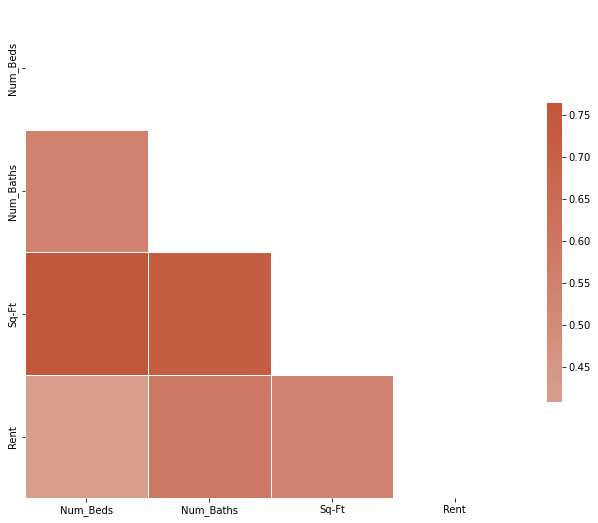

In [17]:
corr_mat1 = df1.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat1, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat1, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

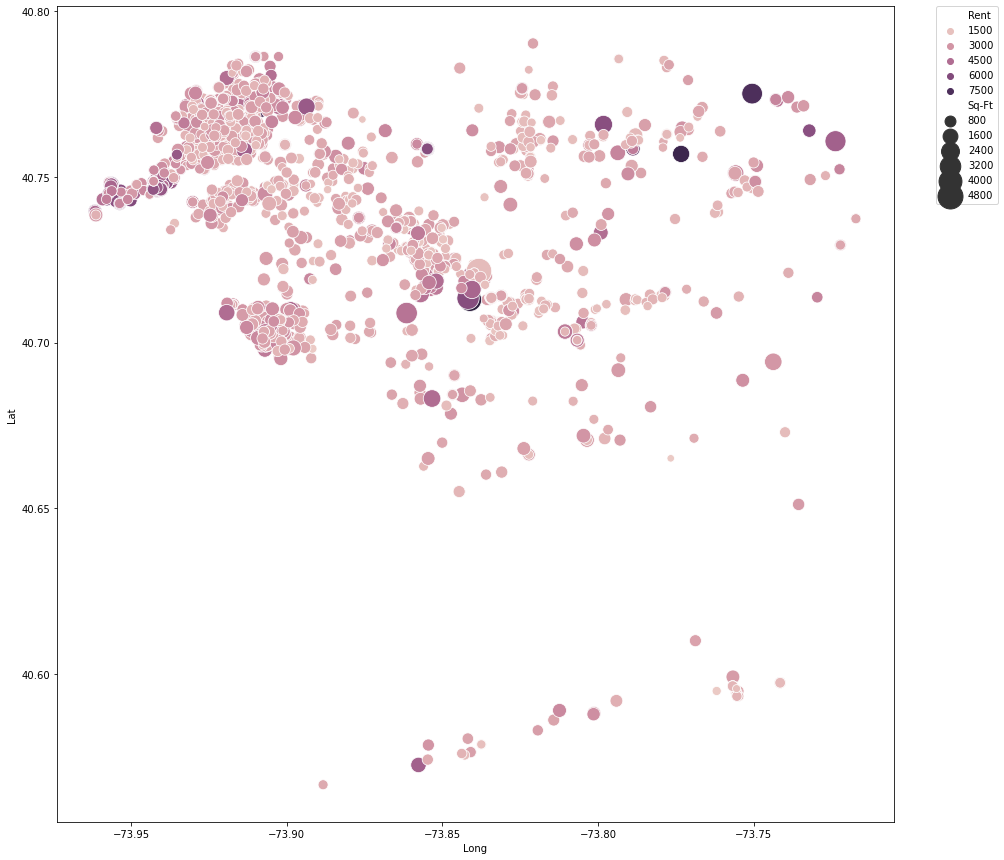

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Rent', size='Sq-Ft', sizes=(50, 650))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

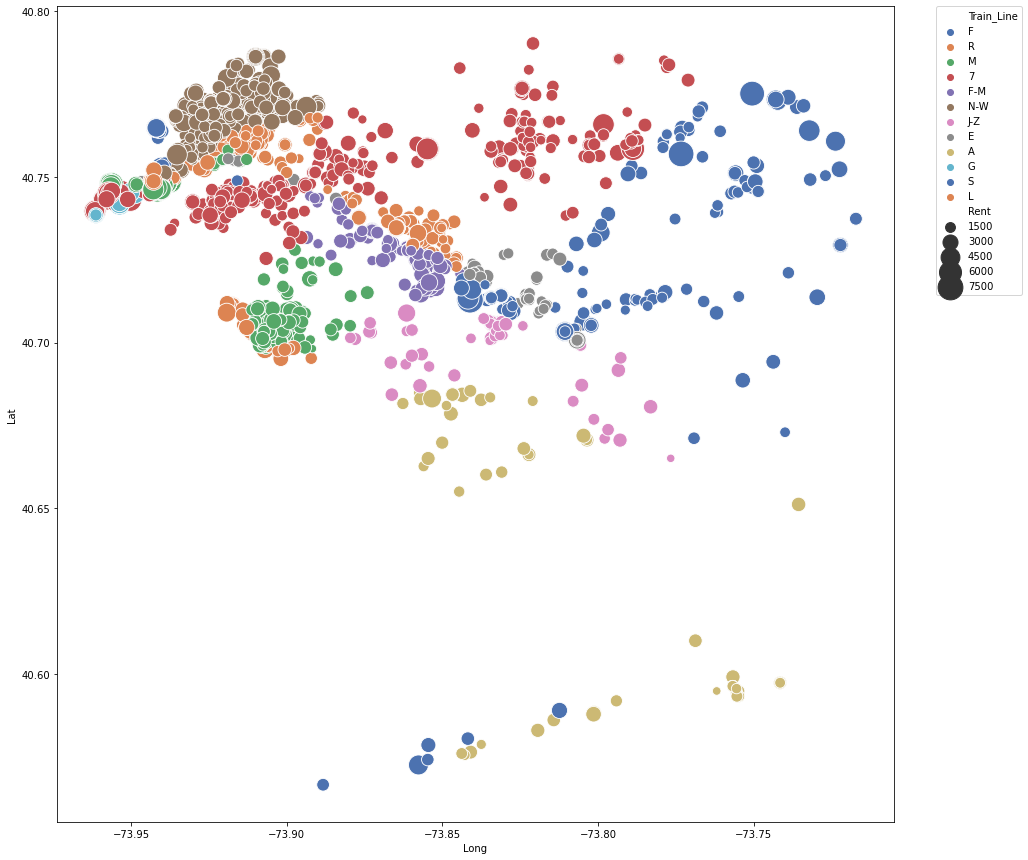

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Train_Line', size='Rent', sizes=(50, 700), palette=sns.color_palette('deep', df['Train_Line'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


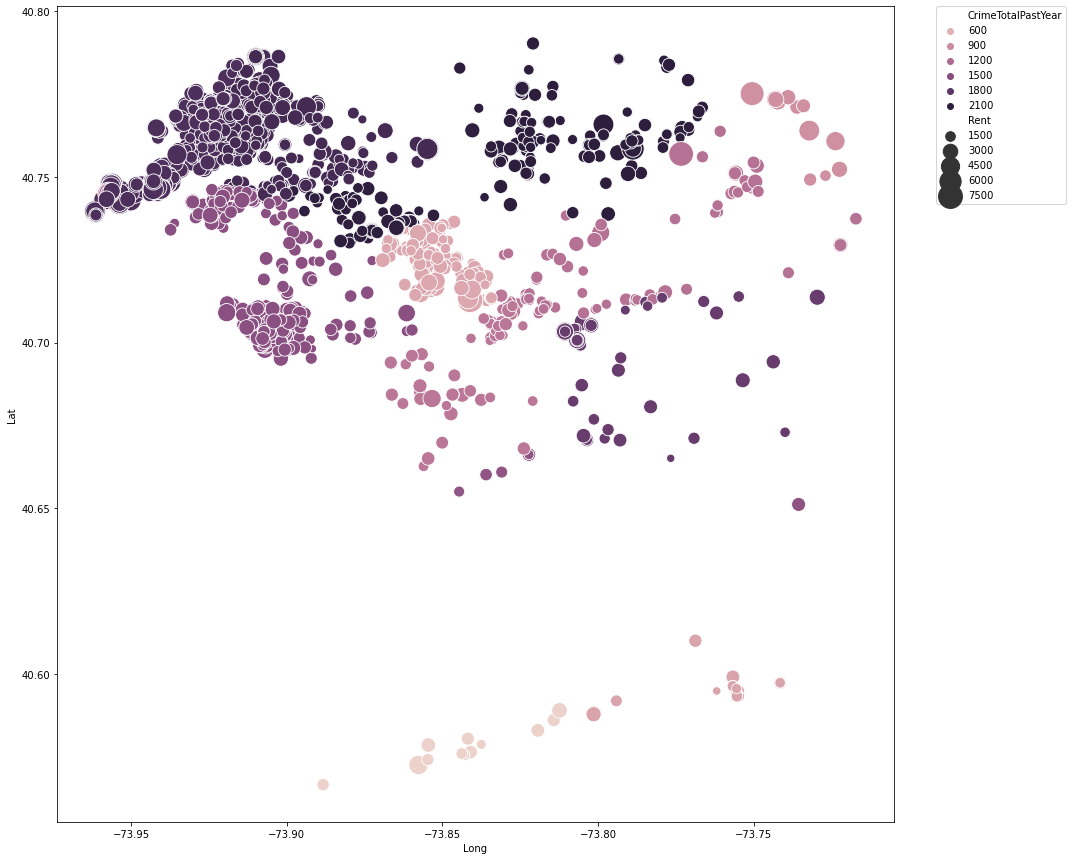

In [38]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='CrimeTotalPastYear', size='Rent', sizes=(50, 650))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


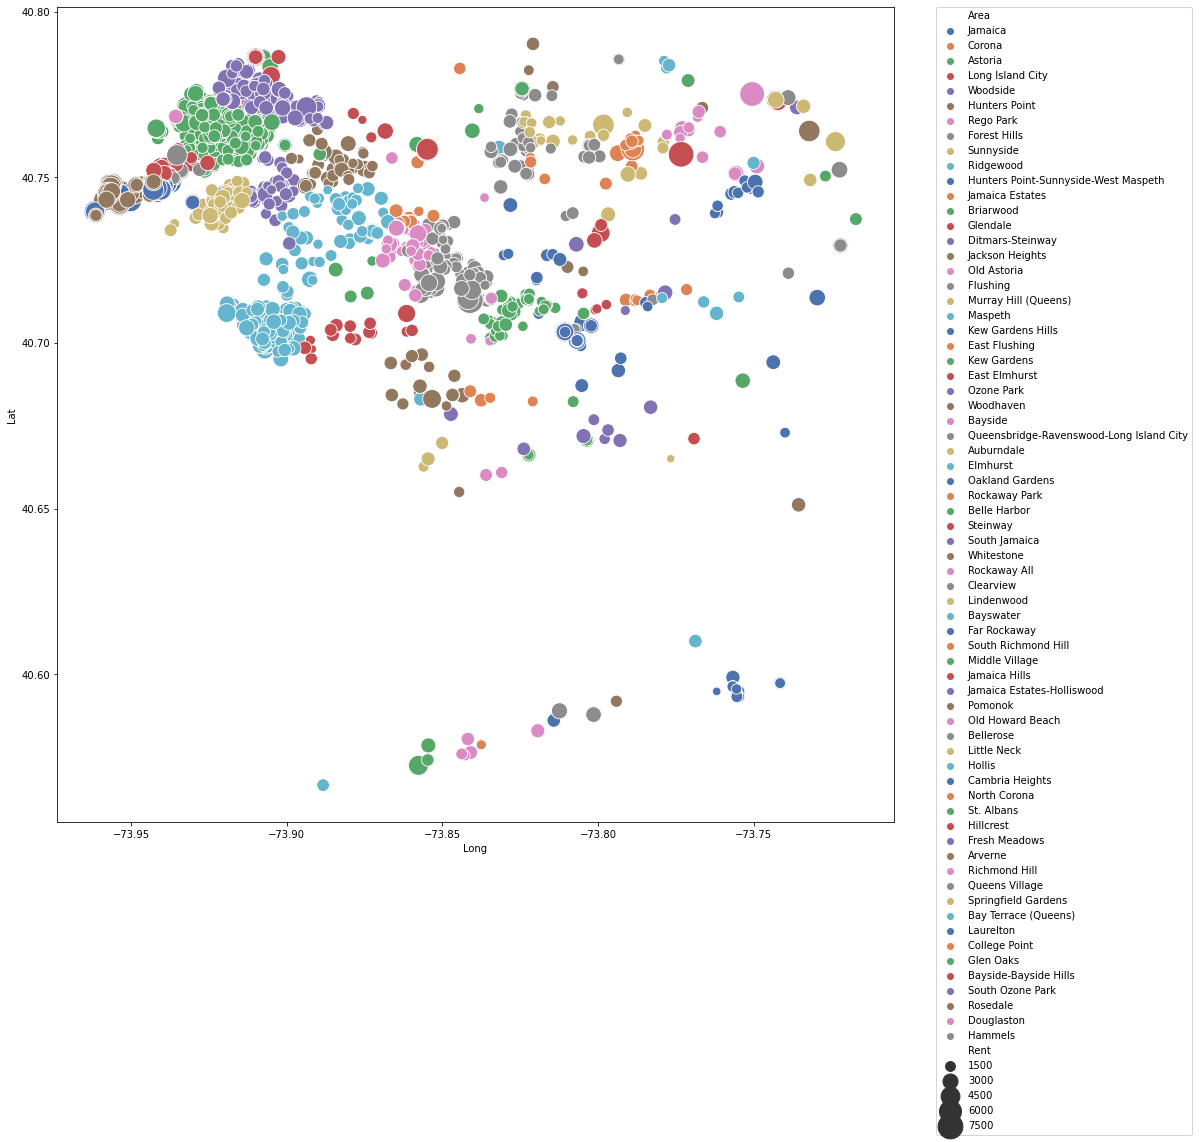

In [39]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Area', size='Rent', sizes=(50, 700), palette=sns.color_palette('deep', df['Area'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [43]:
# correlation between crime and rent

df3 = df[['Sq-Ft', 'Num_Beds', 'Num_Baths', 'CrimeTotalPastYear', 'Rent']]

<AxesSubplot:>

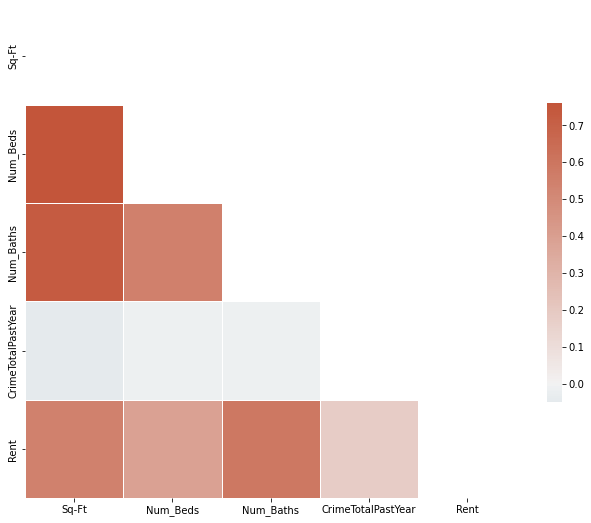

In [44]:
corr_mat3 = df3.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat3, dtype=bool))

f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat3, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

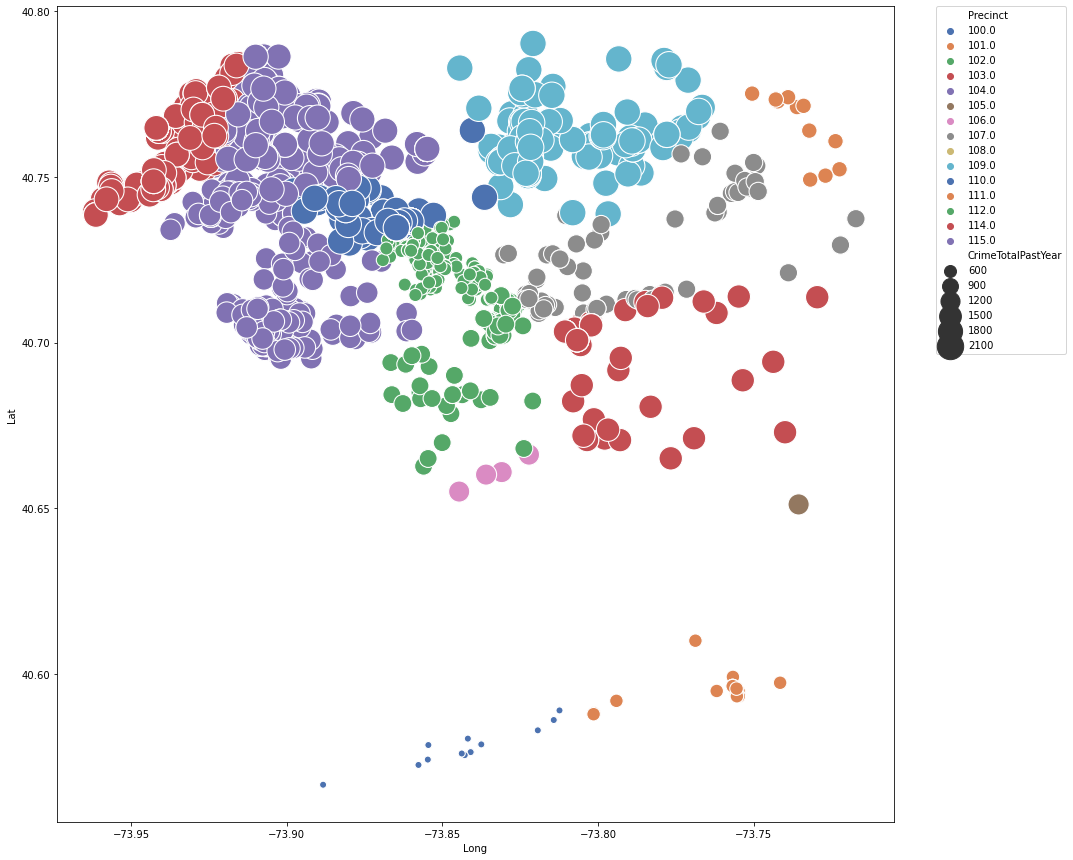

In [45]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Precinct', size='CrimeTotalPastYear', sizes=(50, 700), palette=sns.color_palette('deep', df['Precinct'].unique().shape[0]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
